In [1]:
!mkdir /.kaggle
!mv kaggle.json /.kaggle

In [2]:
!kaggle datasets download -d pythonafroz/solar-panel-images

Dataset URL: https://www.kaggle.com/datasets/pythonafroz/solar-panel-images
License(s): unknown
 99% 301M/305M [00:04<00:00, 20.8MB/s]
100% 305M/305M [00:04<00:00, 64.1MB/s]


In [3]:
!unzip solar-panel-images.zip

Archive:  solar-panel-images.zip
  inflating: Faulty_solar_panel/Bird-drop/Bird (1).jpeg  
  inflating: Faulty_solar_panel/Bird-drop/Bird (10).jpg  
  inflating: Faulty_solar_panel/Bird-drop/Bird (100).jpg  
  inflating: Faulty_solar_panel/Bird-drop/Bird (101).jpg  
  inflating: Faulty_solar_panel/Bird-drop/Bird (102).jpg  
  inflating: Faulty_solar_panel/Bird-drop/Bird (103).jpg  
  inflating: Faulty_solar_panel/Bird-drop/Bird (104).jpg  
  inflating: Faulty_solar_panel/Bird-drop/Bird (105).jpg  
  inflating: Faulty_solar_panel/Bird-drop/Bird (106).jpg  
  inflating: Faulty_solar_panel/Bird-drop/Bird (107).jpg  
  inflating: Faulty_solar_panel/Bird-drop/Bird (108).jpg  
  inflating: Faulty_solar_panel/Bird-drop/Bird (109).jpg  
  inflating: Faulty_solar_panel/Bird-drop/Bird (11).jpg  
  inflating: Faulty_solar_panel/Bird-drop/Bird (110).jpg  
  inflating: Faulty_solar_panel/Bird-drop/Bird (111).jpg  
  inflating: Faulty_solar_panel/Bird-drop/Bird (112).jpg  
  inflating: Faulty_solar_

In [4]:
import os
import shutil

In [5]:
os.mkdir("Faulty_solar_panel/Dirty")
os.mkdir("Faulty_solar_panel/Damaged")

In [6]:
def mv_files(path,destination):
  for file in os.listdir(path):
    shutil.move(f"{path}/{file}",f"{destination}/{file}")
mv_files("Faulty_solar_panel/Dusty","Faulty_solar_panel/Dirty")
mv_files("Faulty_solar_panel/Snow-Covered","Faulty_solar_panel/Dirty")
mv_files("Faulty_solar_panel/Bird-drop","Faulty_solar_panel/Dirty")

mv_files("Faulty_solar_panel/Electrical-damage","Faulty_solar_panel/Damaged")
mv_files("Faulty_solar_panel/Physical-Damage","Faulty_solar_panel/Dirty")
mv_files("Faulty_solar_panel/Dirty/New","Faulty_solar_panel/Dirty")

In [7]:
!rmdir Faulty_solar_panel/Dirty/New Faulty_solar_panel/Bird-drop Faulty_solar_panel/Dusty Faulty_solar_panel/Snow-Covered Faulty_solar_panel/Electrical-damage Faulty_solar_panel/Physical-Damage

In [8]:
import tensorflow as tf

In [17]:
train = tf.keras.utils.image_dataset_from_directory("Faulty_solar_panel",validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(128, 128),
  batch_size=32,
  label_mode = "categorical")

val = tf.keras.utils.image_dataset_from_directory("Faulty_solar_panel",validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(128, 128),
  batch_size=32,
  label_mode = "categorical")

Found 885 files belonging to 3 classes.
Using 708 files for training.
Found 885 files belonging to 3 classes.
Using 177 files for validation.


In [10]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [37]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(128,128,3),
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False


In [38]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

In [39]:
prediction_layer = tf.keras.layers.Dense(3, activation='sigmoid')
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [40]:
inputs = tf.keras.Input(shape=(128, 128, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [41]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [42]:
check_point = tf.keras.callbacks.ModelCheckpoint("./model.keras",save_best_only=True,monitor="val_accuracy",mode="max",initial_value_threshold=0.6)

In [43]:
epochs=100
history = model.fit(
  train,
  validation_data=val,
  epochs=epochs,callbacks=[check_point]
)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 458ms/step - accuracy: 0.5081 - loss: 1.2802 - val_accuracy: 0.6893 - val_loss: 0.7202
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 20s 421ms/step - accuracy: 0.7160 - loss: 0.7243 - val_accuracy: 0.7627 - val_loss: 0.6090
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 409ms/step - accuracy: 0.7617 - loss: 0.5971 - val_accuracy: 0.7571 - val_loss: 0.6187
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 341ms/step - accuracy: 0.7796 - loss: 0.5401 - val_accuracy: 0.6667 - val_loss: 0.7482
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 358ms/step - accuracy: 0.7997 - loss: 0.4948 - val_accuracy: 0.6836 - val_loss: 0.7512
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 388ms/step - accuracy: 0.8401 - loss: 0.3952 - val_accuracy: 0.7006 - val_loss: 0.6986
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 415ms/step - accuracy: 0.8707 - loss: 0.4032 - val_accuracy: 0.6610 - val_loss: 0.7583
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 403ms/step - accuracy: 0.8246 - loss: 0.4319 - val

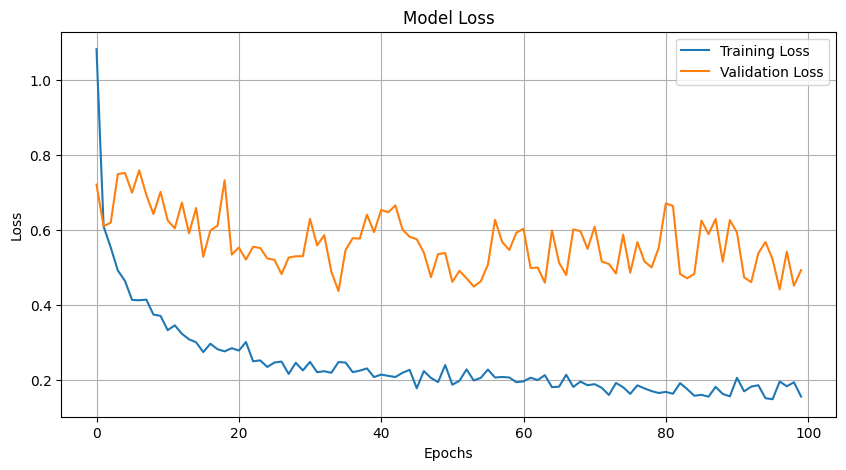

In [65]:
import matplotlib.pyplot as plt

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


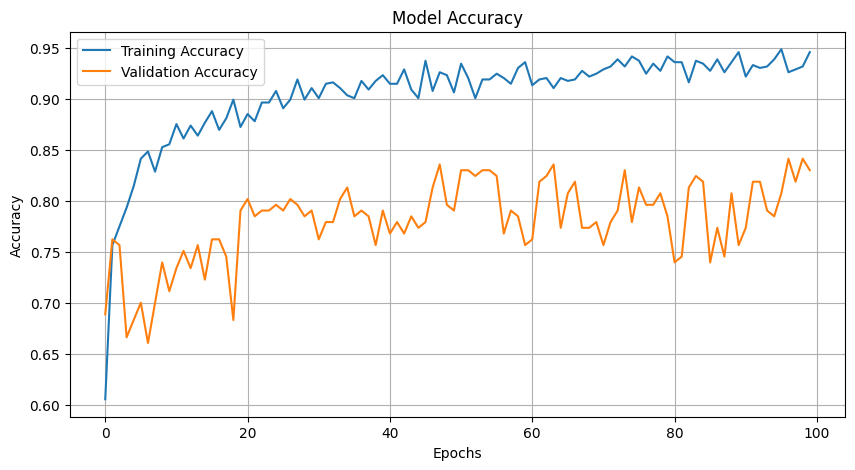

In [66]:
# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()